## Week 5 Workshop: Regression using Non-Parametric Models

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [38]:
# Sample use case: Classifying Iris flower species using K Nearest Neighbors (KNN)

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: 0 = setosa, 1 = versicolor, 2 = virginica



In [39]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing and 80% for training
# random_state=42 ensures reproducibility of the train/test split by setting a fixed seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)



In [40]:
# Train the classifier
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

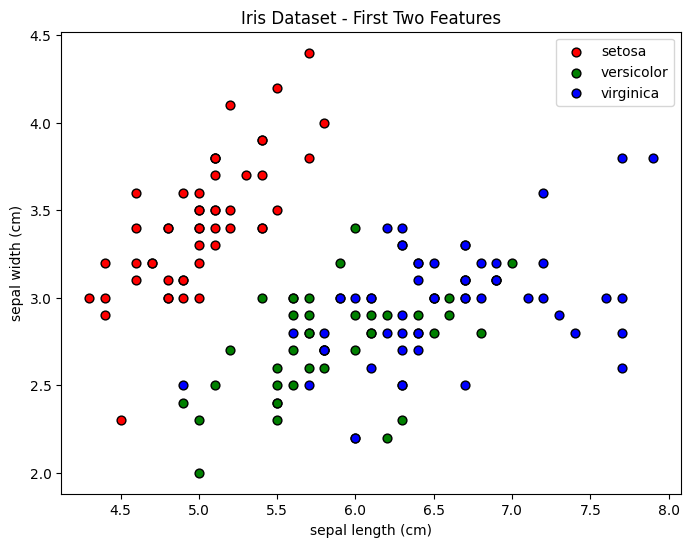

In [41]:
import matplotlib.pyplot as plt

# Use the first two features for visualization
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset - First Two Features")
plt.legend()
plt.show()

In [42]:
# Predict the species for the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Classifier for Iris Dataset")
sample_idx = 10
print("Sample features:", X_test[sample_idx])
print("True label:", y_test[sample_idx])
print("Predicted label:", y_pred[sample_idx])
#print("Test data sample:", X_test)
#print("Test data predictions:", y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

# Explanation:
# KNN classifies a new data point by looking at the 'k' closest labeled data points in the training set.
# The majority label among these neighbors is assigned to the new point.
# In this example, we use KNN to classify iris flowers based on their features.

KNN Classifier for Iris Dataset
Sample features: [6.5 3.2 5.1 2. ]
True label: 2
Predicted label: 2
Test set accuracy: 1.00


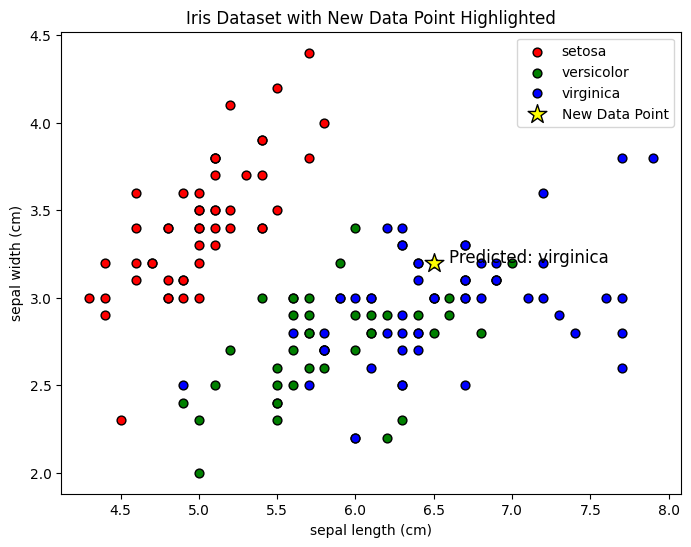

In [43]:
# Visualize the new data point (from X_test[sample_idx]) in the context of the entire dataset
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)

# Plot the new data point
plt.scatter(X_test[sample_idx, 0], X_test[sample_idx, 1], 
            c='yellow', edgecolor='black', s=200, marker='*', label='New Data Point')

# Annotate with predicted class
predicted_label = y_pred[sample_idx]
plt.text(X_test[sample_idx, 0]+0.1, X_test[sample_idx, 1], 
         f'Predicted: {iris.target_names[predicted_label]}', fontsize=12, color='black')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset with New Data Point Highlighted")
plt.legend()
plt.show()

## Challenge: Implement a Regression based on Decision Trees

- Use the same data set (Iris)
- Choose your features (one, two, all...)
- Train, test and visualize


In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# For regression, let's predict petal length (feature index 2) using the other features
y_reg = X[:, 2]  # Petal length
X_reg = X[:, [0, 1, 3]]  # Use all features except petal length

# Split into train and test sets (reuse train_test_split if available)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_reg_train, y_reg_train)

# Predict on the test set
y_reg_pred = dt_reg.predict(X_reg_test)

# Evaluate the regression performance
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Decision Tree Regression MSE (Petal Length): {mse:.2f}")

Decision Tree Regression MSE (Petal Length): 0.19


In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9666666666666668


## Three Talking Points on Cross-Validation
1. Why Use Cross-Validation?

Cross-validation provides a more reliable estimate of model performance by evaluating it on multiple train-test splits instead of just one. This helps prevent overfitting and gives a better sense of generalization.

2. Choice of cv=5

We used 5-fold cross-validation, which balances computational efficiency with accuracy. The dataset is split into 5 parts, and the model is trained and tested 5 times, each time using a different fold as the test set.

3. Interpreting the Results

The mean of the cross-validation scores represents the average accuracy across folds, offering a more stable performance metric than a single train-test split.